# **AdaBoost - Step by Step**

## **Import Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

## **Create a DataFrame**

In [2]:
# Create a custom dataframe
data = {
    "x1": [1, 2, 3, 4, 5, 6, 6, 7, 9, 9],
    "x2": [5, 3, 6, 8, 1, 9, 5, 8, 9, 2],
    "label": [1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
}
df = pd.DataFrame(data)
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


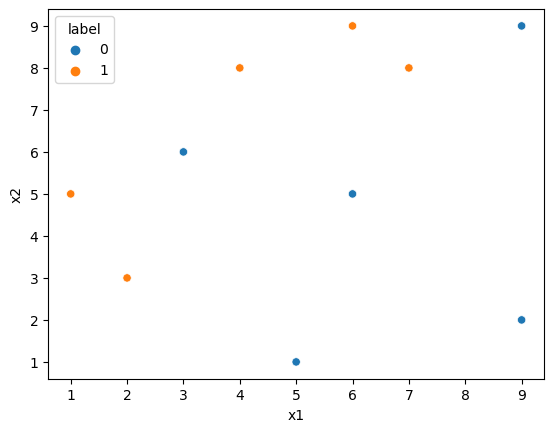

In [3]:
# Plot the data
sns.scatterplot(x=df["x1"], y=df["x2"], hue=df["label"]);

## **Step-1: Initialize Weights**
Start with your training dataset. Each example in the dataset is initially given the same weight. This means that every example is equally important at the beginning.

In [9]:
# Assign weights to each rows
# Initial weights = 1/n
df["weights"] = 1 / df.shape[0]
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


## **Step-2: Train the First Decision Stump**

In [7]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

In [8]:
# Train a decision stump / weak classifier
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

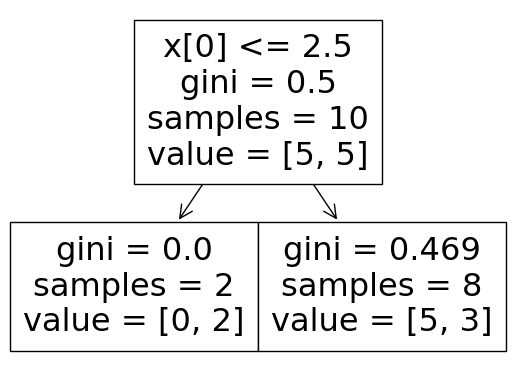

In [9]:
# Plot the tree
plot_tree(dt1);

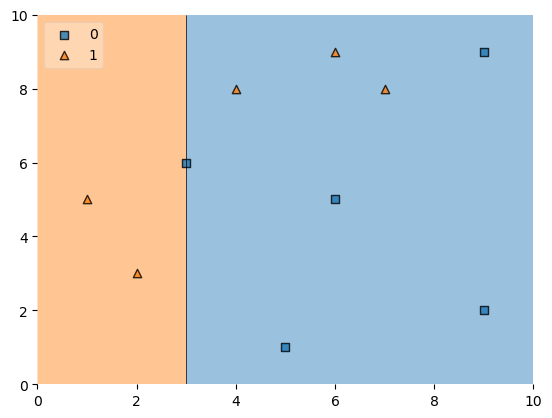

In [10]:
# Plot the decision region
plot_decision_regions(X, y, clf=dt1, legend=2);

In [11]:
# Calculate prediction of the first model
df["y_pred"] = dt1.predict(X)
df

,x1,x2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,0
3,4,8,1,0
4,5,1,0,0
5,6,9,1,0
6,6,5,0,0
7,7,8,1,0
8,9,9,0,0
9,9,2,0,0


## **Step-3: Calculate Model Weight**

In [13]:
# Write a function to calculate the model weight (alpha)
def calculate_model_weights(data):
    df = data
    df["weights"] = 1 / df.shape[0]
    
    error = 0

    for index, row in df.iterrows():
        if row["label"] != row["y_pred"]:
            error += row["weights"]

    alpha = 0.5 * np.log((1 - error) / (error + 0.000000001))

    return alpha

In [14]:
# Calculate weight of the first model
alpha1 = calculate_model_weights(df)
alpha1

0.42364892852693503

## **Step-4: Update the Row Weights**

In [15]:
# Write a function to update the weights of each row
def update_row_weights(row, alpha):
    if row["label"] == row["y_pred"]:
        return row["weights"] * np.exp(-alpha)

    else:
        return row["weights"] * np.exp(alpha)

In [16]:
# Update the weights
df["updated_weights"] = df.apply(lambda row: update_row_weights(row, alpha1), axis=1)
df

,x1,x2,label,y_pred,weights,updated_weights
0,1,5,1,1,0.1,0.065465
1,2,3,1,1,0.1,0.065465
2,3,6,0,0,0.1,0.065465
3,4,8,1,0,0.1,0.152753
4,5,1,0,0,0.1,0.065465
5,6,9,1,0,0.1,0.152753
6,6,5,0,0,0.1,0.065465
7,7,8,1,0,0.1,0.152753
8,9,9,0,0,0.1,0.065465
9,9,2,0,0,0.1,0.065465


In [17]:
# Normalized the weights
df["normalized_weights"] = df["updated_weights"] / df["updated_weights"].sum()
df

,x1,x2,label,y_pred,weights,updated_weights,normalized_weights
0,1,5,1,1,0.1,0.065465,0.071429
1,2,3,1,1,0.1,0.065465,0.071429
2,3,6,0,0,0.1,0.065465,0.071429
3,4,8,1,0,0.1,0.152753,0.166667
4,5,1,0,0,0.1,0.065465,0.071429
5,6,9,1,0,0.1,0.152753,0.166667
6,6,5,0,0,0.1,0.065465,0.071429
7,7,8,1,0,0.1,0.152753,0.166667
8,9,9,0,0,0.1,0.065465,0.071429
9,9,2,0,0,0.1,0.065465,0.071429


In [18]:
df["normalized_weights"].sum()

1.0

## **Step-5: Initialize Ranges**

In [19]:
def initialize_ranges(data):
    range_data = pd.DataFrame(data)
    range_data["cumsum_upper"] = np.cumsum(range_data["normalized_weights"])
    range_data["cumsum_lower"] = (
        range_data["cumsum_upper"] - range_data["normalized_weights"]
    )
    range_data = range_data[
        [
            "x1",
            "x2",
            "label",
            "weights",
            "y_pred",
            "updated_weights",
            "normalized_weights",
            "cumsum_lower",
            "cumsum_upper",
        ]
    ]
    return range_data

In [20]:
df = initialize_ranges(df)
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.071429,0.142857,0.214286
3,4,8,1,0.1,0,0.152753,0.166667,0.214286,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.380952,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.452381,0.619048
6,6,5,0,0.1,0,0.065465,0.071429,0.619048,0.690476
7,7,8,1,0.1,0,0.152753,0.166667,0.690476,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,0.857143,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,0.928571,1.000000


## **Step-6: Create a New Dataset for Upsampling**

In [31]:
# Write a function to create a new dataset based on ranges
def create_new_dataset(data):
    indices = []

    for i in range(data.shape[0]):
        a = np.random.random()
        for index, row in data.iterrows():
            if row["cumsum_lower"] < a < row["cumsum_upper"]:
                indices.append(index)

    print(indices)
    new_data = data.iloc[indices, [0, 1, 2, 3]]

    return new_data

In [32]:
df2 = create_new_dataset(df)
df2

[3, 0, 7, 7, 2, 3, 0, 1, 5, 4]


,x1,x2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1


## **Steps-7: Iterate the Process for All the Decision Stumps**

### **Second Decision Stumps**

In [33]:
X = df2.iloc[:, :2].values
y = df2.iloc[:, 2].values

In [35]:
# Initialize the second decision stump
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

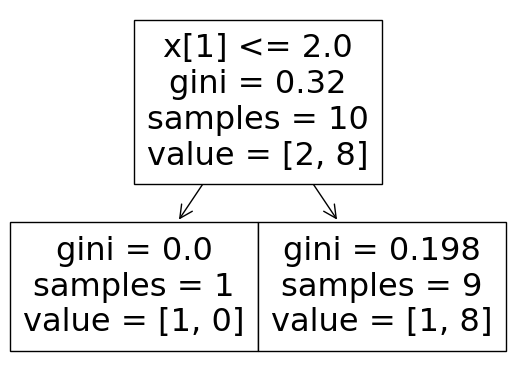

In [36]:
# Plot the tree
plot_tree(dt2);

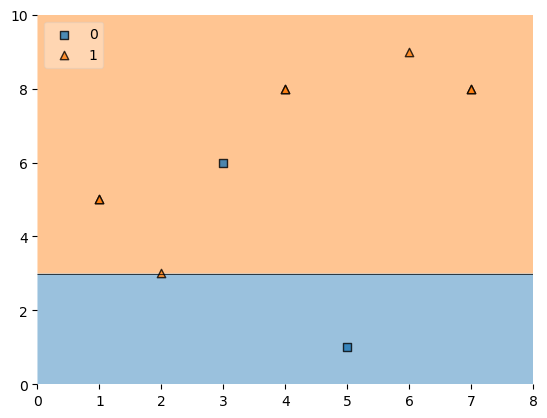

In [37]:
# Plot the decision region
plot_decision_regions(X, y, clf=dt2, legend=2);

In [38]:
# Calculate prediction of the second model
df2["y_pred"] = dt2.predict(X)
df2

,x1,x2,label,weights,y_pred
3,4,8,1,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0


In [39]:
# Calculate weight(alpha) for the second model
alpha2 = calculate_model_weights(df2)
alpha2

1.0986122836681098

In [40]:
# Update the row weights
df2["updated_weights"] = df2.apply(lambda row: update_row_weights(row, alpha2), axis=1)
df2

,x1,x2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033333
0,1,5,1,0.1,1,0.033333
7,7,8,1,0.1,1,0.033333
7,7,8,1,0.1,1,0.033333
2,3,6,0,0.1,1,0.300000
3,4,8,1,0.1,1,0.033333
0,1,5,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
5,6,9,1,0.1,1,0.033333
4,5,1,0,0.1,0,0.033333


In [41]:
# Normalized the weights
df2["normalized_weights"] = df2["updated_weights"] / df2["updated_weights"].sum()
df2

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.1,1,0.033333,0.055556
0,1,5,1,0.1,1,0.033333,0.055556
7,7,8,1,0.1,1,0.033333,0.055556
7,7,8,1,0.1,1,0.033333,0.055556
2,3,6,0,0.1,1,0.300000,0.500000
3,4,8,1,0.1,1,0.033333,0.055556
0,1,5,1,0.1,1,0.033333,0.055556
1,2,3,1,0.1,1,0.033333,0.055556
5,6,9,1,0.1,1,0.033333,0.055556
4,5,1,0,0.1,0,0.033333,0.055556


In [42]:
# Initialize ranges
df2 = initialize_ranges(df2)
df2

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.033333,0.055556,0.000000,0.055556
0,1,5,1,0.1,1,0.033333,0.055556,0.055556,0.111111
7,7,8,1,0.1,1,0.033333,0.055556,0.111111,0.166667
7,7,8,1,0.1,1,0.033333,0.055556,0.166667,0.222222
2,3,6,0,0.1,1,0.300000,0.500000,0.222222,0.722222
3,4,8,1,0.1,1,0.033333,0.055556,0.722222,0.777778
0,1,5,1,0.1,1,0.033333,0.055556,0.777778,0.833333
1,2,3,1,0.1,1,0.033333,0.055556,0.833333,0.888889
5,6,9,1,0.1,1,0.033333,0.055556,0.888889,0.944444
4,5,1,0,0.1,0,0.033333,0.055556,0.944444,1.000000


In [43]:
# Create a new dataframe
df3 = create_new_dataset(df2)
df3

[3, 2, 2, 2, 2, 5, 3, 4, 2, 7]


,x1,x2,label,weights
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1


### **Third Decision Stumps**

In [44]:
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values

In [45]:
# Initialize the third decision stump
dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

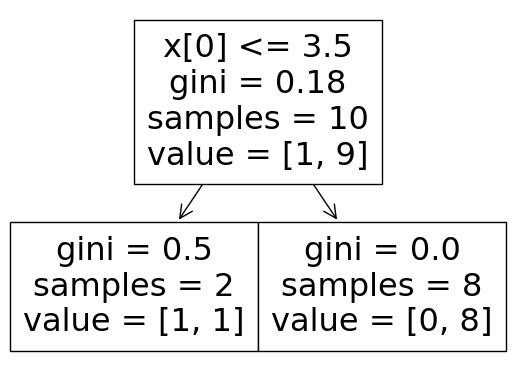

In [46]:
# Plot the tree
plot_tree(dt3);

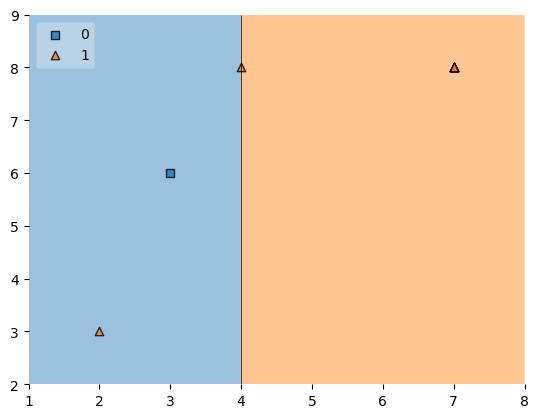

In [47]:
# Plot the decision region
plot_decision_regions(X, y, clf=dt3, legend=2);

In [48]:
# Calculate prediction of the third model
df3["y_pred"] = dt3.predict(X)
df3

,x1,x2,label,weights,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
1,2,3,1,0.1,0


In [49]:
# Calculate weight(alpha) for the third model
alpha3 = calculate_model_weights(df3)
alpha3

1.0986122836681098

In [50]:
print("alpha1:", alpha1)
print("alpha2:", alpha2)
print("alpha3:", alpha3)

alpha1: 0.42364892852693503
alpha2: 1.0986122836681098
alpha3: 1.0986122836681098


## **Step-8: Calculate the Output**

In [51]:
# Select one query points
query1 = df.iloc[0, :2].values.reshape(1, 2)
query1

array([[1., 5.]])

In [53]:
# Predict the query with three decision stumps
pred1 = (
    (alpha1 * dt1.predict(query1)[0])
    + (alpha2 * dt2.predict(query1)[0])
    + (alpha3 * dt3.predict(query1))[0]
)
pred1 = np.sign(pred1)
pred1

1.0

In [54]:
# Select another query points
query2 = df.iloc[8, :2].values.reshape(1, 2)
query2

array([[9., 9.]])

In [55]:
# Predict the query with three decision stumps
pred2 = (
    (alpha1 * dt1.predict(query2)[0])
    + (alpha2 * dt2.predict(query2)[0])
    + (alpha3 * dt3.predict(query2))[0]
)
pred2 = np.sign(pred2)
pred2

1.0